In [1]:
import pandas as pd

# Load the dataset
# file_path = 'path_to_file/housing.csv'
housing_data = pd.read_csv('housing.csv')

In [2]:
# Inspect the data
housing_data.info()
housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


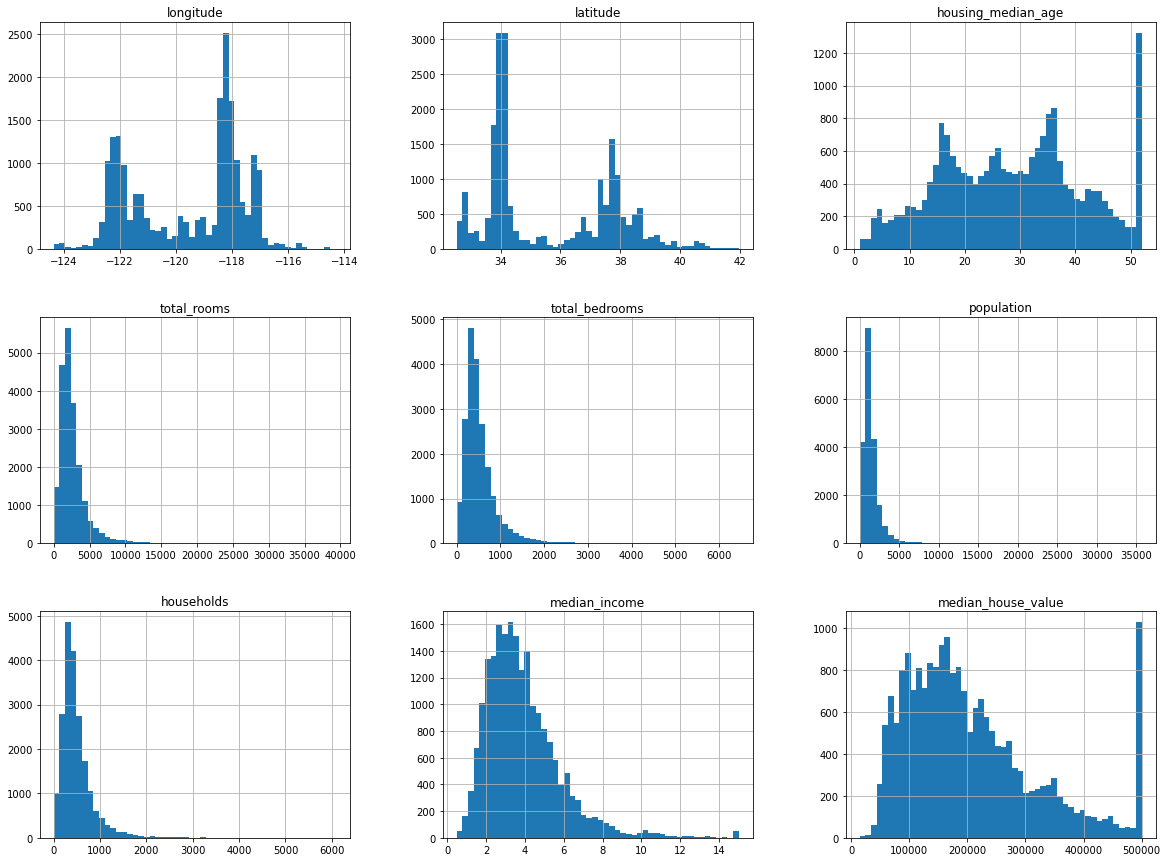

In [3]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical attribute
housing_data.hist(bins=50, figsize=(20,15))
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [5]:
import numpy as np

# Create income categories based on the median income
housing_data['income_cat'] = pd.cut(housing_data['median_income'],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified split based on the income category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

# Drop the income category to return to original data
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

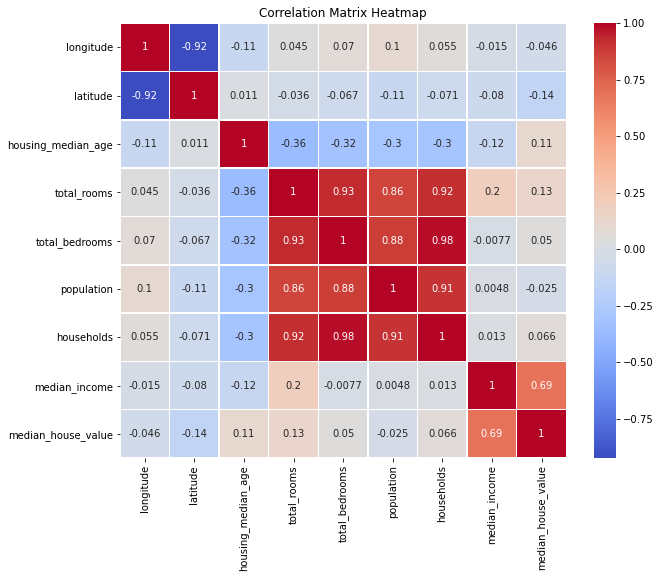

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = housing_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

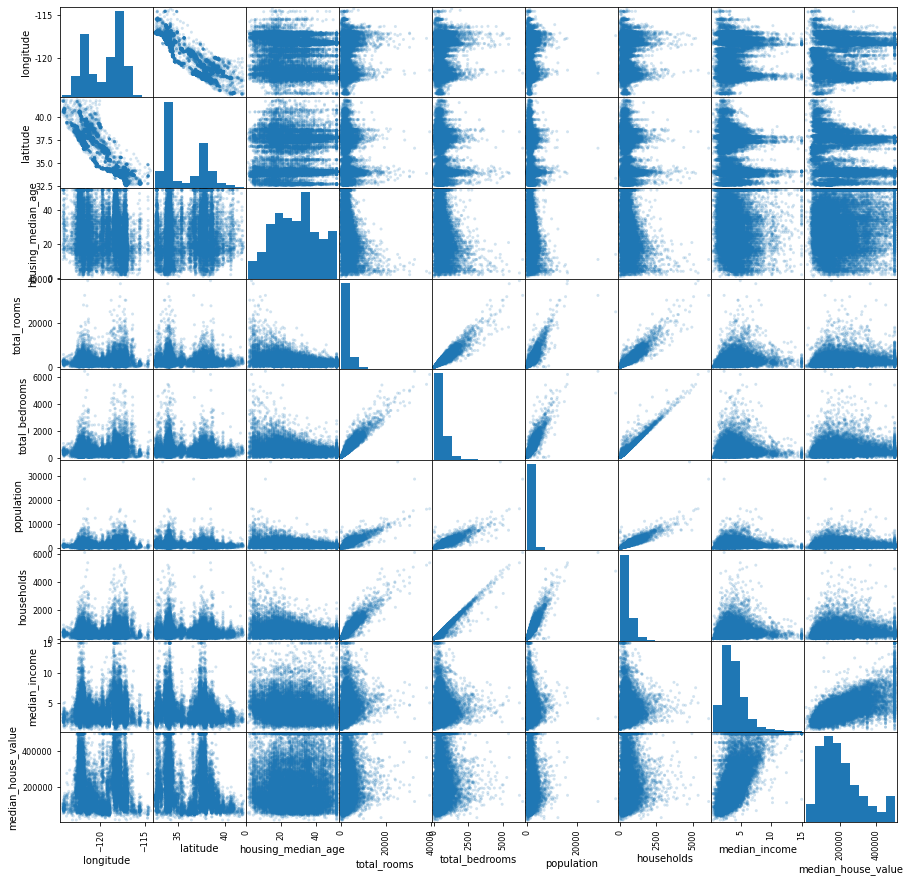

In [8]:
from pandas.plotting import scatter_matrix

# Select only numerical attributes
numerical_attributes = housing_data.select_dtypes(include=['float64', 'int64'])

# Plot scatter matrix for numerical attributes
scatter_matrix(numerical_attributes, figsize=(15, 15), alpha=0.2, diagonal='hist')
plt.show()


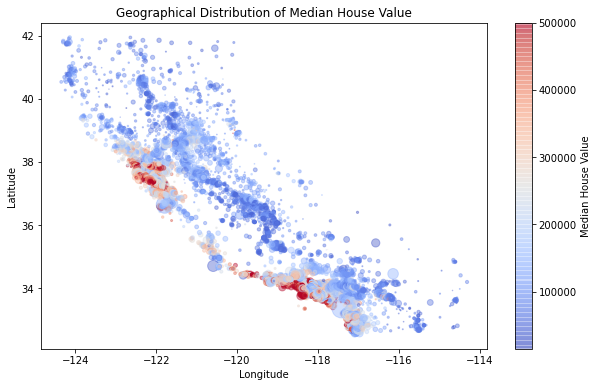

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(housing_data['longitude'], housing_data['latitude'], alpha=0.4,
            c=housing_data['median_house_value'], cmap='coolwarm', s=housing_data['population']/100, label='Population')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Median House Value')
plt.show()


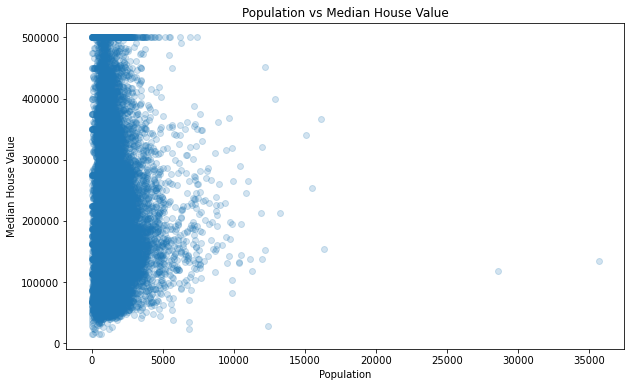

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['population'], housing_data['median_house_value'], alpha=0.2)
plt.title('Population vs Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()


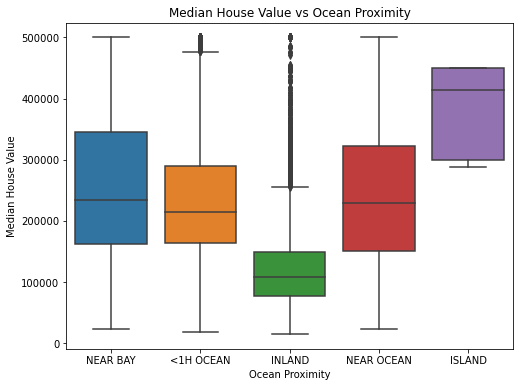

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_data)
plt.title('Median House Value vs Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


In [13]:
# Option 1: Fill missing values in 'total_bedrooms' with median
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)

# Option 2: Drop rows with missing values (less common)
housing_data.dropna(subset=['total_bedrooms'], inplace=True)


In [14]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [16]:
# Check for missing values in the dataset
missing_values = housing_data.isnull().sum()

# Display the columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [17]:
# Convert the 'ocean_proximity' categorical column to numerical
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)

# Check if conversion worked
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0,0,1,0


In [18]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   longitude                   20640 non-null  float64 
 1   latitude                    20640 non-null  float64 
 2   housing_median_age          20640 non-null  float64 
 3   total_rooms                 20640 non-null  float64 
 4   total_bedrooms              20640 non-null  float64 
 5   population                  20640 non-null  float64 
 6   households                  20640 non-null  float64 
 7   median_income               20640 non-null  float64 
 8   median_house_value          20640 non-null  float64 
 9   income_cat                  20640 non-null  category
 10  ocean_proximity_INLAND      20640 non-null  uint8   
 11  ocean_proximity_ISLAND      20640 non-null  uint8   
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8   
 13  ocean_proximity_

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline for scaling
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Apply the pipeline to the numerical data
housing_num = housing_data.drop('median_house_value', axis=1)  # Exclude target variable
housing_scaled = num_pipeline.fit_transform(housing_num)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline for scaling
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Apply the pipeline to the numerical data
housing_num = housing_data.drop('median_house_value', axis=1)  # Exclude target variable
housing_scaled = num_pipeline.fit_transform(housing_num)


In [20]:
# Make predictions
y_pred = lin_reg.predict(X_test)

# Check a few predictions against actual values
print(y_pred[:5], y_test[:5])


NameError: name 'lin_reg' is not defined

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the linear regression model
lin_reg = LinearRegression()

# Train the model on the training set
lin_reg.fit(X_train, y_train)

# Now you can make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Check a few predictions against actual values
print(y_pred[:5], y_test[:5])

NameError: name 'X' is not defined

In [24]:
# Assuming 'housing_data' is your dataframe
# Select feature columns (everything except the target 'median_house_value')
X = housing_data.drop('median_house_value', axis=1)

# Target variable (median house value)
y = housing_data['median_house_value']


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression

# Define the linear regression model
lin_reg = LinearRegression()

# Train the model on the training set
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Check a few predictions against actual values
print(y_pred[:5], y_test[:5])


[ 56397.3245946  118196.5703808  252950.50341806 266932.11570222
 262842.22321053] 20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(f"Linear Regression RMSE: {lin_rmse}")


Linear Regression RMSE: 70040.67679908338


In [28]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Make predictions and calculate RMSE for Decision Tree
y_tree_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_rmse = np.sqrt(tree_mse)
print(f"Decision Tree RMSE: {tree_rmse}")


Decision Tree RMSE: 68355.80906221256


In [29]:
from sklearn.metrics import mean_absolute_error, r2_score

# MAE for Linear Regression
lin_mae = mean_absolute_error(y_test, y_pred)
print(f"Linear Regression MAE: {lin_mae}")

# R-squared for Decision Tree
tree_r2 = r2_score(y_test, y_tree_pred)
print(f"Decision Tree R-squared: {tree_r2}")


Linear Regression MAE: 50857.04301742913
Decision Tree R-squared: 0.6434306609512037


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics for Linear Regression
y_pred_lin = lin_reg.predict(X_test)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
lin_mae = mean_absolute_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)

# Calculate metrics for Decision Tree
y_pred_tree = tree_reg.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

# Calculate metrics for Random Forest
y_pred_forest = forest_reg.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, y_pred_forest))
forest_mae = mean_absolute_error(y_test, y_pred_forest)
forest_r2 = r2_score(y_test, y_pred_forest)

# Print the results
print("Performance Metrics for Linear Regression:")
print(f"RMSE: {lin_rmse}")
print(f"MAE: {lin_mae}")
print(f"R-squared: {lin_r2}")

print("\nPerformance Metrics for Decision Tree:")
print(f"RMSE: {tree_rmse}")
print(f"MAE: {tree_mae}")
print(f"R-squared: {tree_r2}")

print("\nPerformance Metrics for Random Forest:")
print(f"RMSE: {forest_rmse}")
print(f"MAE: {forest_mae}")
print(f"R-squared: {forest_r2}")


Performance Metrics for Linear Regression:
RMSE: 70040.67679908338
MAE: 50857.04301742913
R-squared: 0.6256362335780781

Performance Metrics for Decision Tree:
RMSE: 68355.80906221256
MAE: 43593.814195736435
R-squared: 0.6434306609512037

Performance Metrics for Random Forest:
RMSE: 49023.88145422384
MAE: 31661.547051841088
R-squared: 0.816596116728073


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have already split the data into X_train, y_train, X_test, y_test

# Train the Random Forest model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Calculate metrics for Random Forest
y_pred_forest = forest_reg.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, y_pred_forest))
forest_mae = mean_absolute_error(y_test, y_pred_forest)
forest_r2 = r2_score(y_test, y_pred_forest)

# Print the results for Random Forest
print("Performance Metrics for Random Forest:")
print(f"RMSE: {forest_rmse}")
print(f"MAE: {forest_mae}")
print(f"R-squared: {forest_r2}")


Performance Metrics for Random Forest:
RMSE: 49023.88145422384
MAE: 31661.547051841088
R-squared: 0.816596116728073


In [36]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [37]:
# Train the SVR model with 'rbf' kernel
svr_reg = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_reg.predict(X_test)


In [38]:
# Calculate metrics for SVR
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

# Print the results for SVR
print("Performance Metrics for SVR:")
print(f"RMSE: {svr_rmse}")
print(f"MAE: {svr_mae}")
print(f"R-squared: {svr_r2}")


Performance Metrics for SVR:
RMSE: 113903.05776452477
MAE: 84791.48929809225
R-squared: 0.009934548409084587


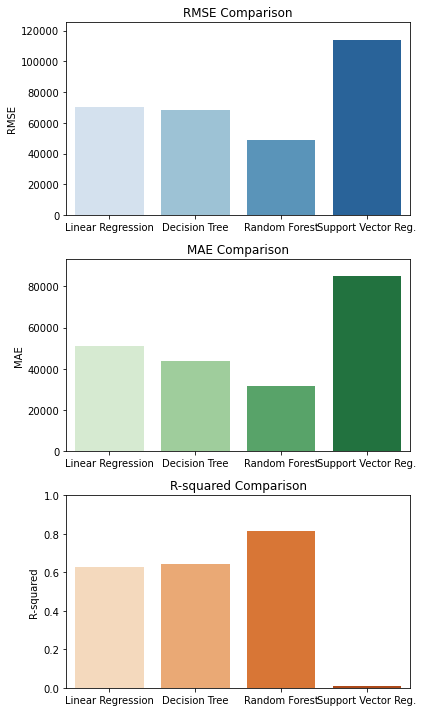

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Reg.']

# Performance metrics
rmse = [70040.68, 68355.81, 49023.88, 113903.06]
mae = [50857.04, 43593.81, 31661.55, 84791.49]
r_squared = [0.6256, 0.6434, 0.8166, 0.0099]

# Set up the figure
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# RMSE Bar Plot
sns.barplot(x=models, y=rmse, ax=axes[0], palette='Blues')
axes[0].set_title('RMSE Comparison')
axes[0].set_ylabel('RMSE')
axes[0].set_ylim(0, max(rmse) * 1.1)  # Set limit for better visualization

# MAE Bar Plot
sns.barplot(x=models, y=mae, ax=axes[1], palette='Greens')
axes[1].set_title('MAE Comparison')
axes[1].set_ylabel('MAE')
axes[1].set_ylim(0, max(mae) * 1.1)

# R-squared Bar Plot
sns.barplot(x=models, y=r_squared, ax=axes[2], palette='Oranges')
axes[2].set_title('R-squared Comparison')
axes[2].set_ylabel('R-squared')
axes[2].set_ylim(0, 1)  # R-squared is typically between 0 and 1

# Show the plots
plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Load your housing data
# housing_data = pd.read_csv('/mnt/data/housing.csv')

# Separate the features and the target variable
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor()

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}


In [5]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Print the results for each hyperparameter combination
cv_results = grid_search.cv_results_

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Mean score: {-mean_score} for {params}")

from sklearn.model_selection import RandomizedSearchCV

# Define a larger range for hyperparameters
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: could not convert string to float: 'NEAR OCEAN'

In [6]:
# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Get the best parameters
best_random_params = random_search.best_params_
print("Best Hyperparameters from Randomized Search:", best_random_params)

# Compare the best score from grid search and randomized search
print("Best score from Grid Search:", -grid_search.best_score_)
print("Best score from Randomized Search:", -random_search.best_score_)


NameError: name 'RandomizedSearchCV' is not defined

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Assume X_train and y_train are your training features and labels from the housing data
# Define the model
rf = RandomForestRegressor()

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\Riyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: could not convert string to float: 'NEAR OCEAN'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
housing_data = pd.read_csv('housing.csv')

# Step 2: Prepare the data
X = housing_data.drop('median_house_value', axis=1)  # Features
y = housing_data['median_house_value']  # Target variable

# Handling missing values if necessary (example: fill with median)
X.fillna(X.median(), inplace=True)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Store MAE and R² scores before fine-tuning
mae_before = []
r2_before = []

# Step 4: Train and evaluate each model before fine-tuning
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_before.append(mean_absolute_error(y_test, y_pred))
    r2_before.append(r2_score(y_test, y_pred))

# Step 5: Hyperparameter tuning
# Define hyperparameters for Grid Search and Randomized Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Randomized search
rf_random = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid_rf, n_iter=10, cv=5, random_state=42)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_

# Step 6: Evaluate the best model
y_pred_rf = best_rf.predict(X_test)
mae_after = mean_absolute_error(y_test, y_pred_rf)
r2_after = r2_score(y_test, y_pred_rf)

# Step 7: Comparison Results
# Print results before and after fine-tuning for Random Forest
print("MAE before fine-tuning:")
print(mae_before)
print("\nMAE after fine-tuning (Random Forest):", mae_after)

print("\nR² before fine-tuning:")
print(r2_before)
print("\nR² after fine-tuning (Random Forest):", r2_after)

# Step 8: MAE Comparison (Before vs After Fine-Tuning)
plt.figure(figsize=(12, 6))

# MAE Comparison
plt.subplot(1, 2, 1)
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x - bar_width/2, mae_before, width=bar_width, label='Before Tuning', color='lightblue')
plt.bar(len(models) - bar_width/2, mae_after, width=bar_width, label='After Tuning (RF)', color='orange')

plt.xticks(x, list(models.keys()) + ['Random Forest (Tuned)'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison (Before vs After Fine-Tuning)')
plt.legend()

# Step 9: R² Score Comparison
plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, r2_before, width=bar_width, label='Before Tuning', color='lightblue')
plt.bar(len(models) - bar_width/2, r2_after, width=bar_width, label='After Tuning (RF)', color='orange')

plt.xticks(x, list(models.keys()) + ['Random Forest (Tuned)'])
plt.ylabel('R² Score')
plt.title('R² Score Comparison (Before vs After Fine-Tuning)')
plt.legend()

# Step 10: Show plots
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'NEAR OCEAN'

MAE before fine-tuning:
[50670.73824097279, 43611.742005813954, 31613.643611918604, 87344.19485380792]

MAE after fine-tuning (Random Forest): 31734.415729071294

R² before fine-tuning:
[0.6254240620553644, 0.6390359553833069, 0.8169715119998686, -0.04873339033817237]

R² after fine-tuning (Random Forest): 0.8163879043850557


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

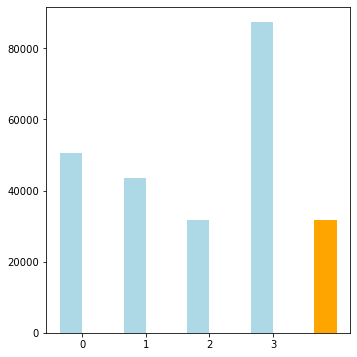

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Step 1: Load the dataset
housing_data = pd.read_csv('housing.csv')

# Step 2: Prepare the data
X = housing_data.drop('median_house_value', axis=1)  # Features
y = housing_data['median_house_value']  # Target variable

# Handling missing values if necessary (example: fill with median)
X.fillna(X.median(), inplace=True)

# Step 2.1: Convert categorical variables using One-Hot Encoding
# Identify categorical columns
categorical_cols = ['ocean_proximity']

# Create a Column Transformer that applies One-Hot Encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Transform the feature set
X_transformed = preprocessor.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 3: Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Store MAE and R² scores before fine-tuning
mae_before = []
r2_before = []

# Step 4: Train and evaluate each model before fine-tuning
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_before.append(mean_absolute_error(y_test, y_pred))
    r2_before.append(r2_score(y_test, y_pred))

# Step 5: Hyperparameter tuning
# Define hyperparameters for Grid Search and Randomized Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Randomized search
rf_random = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid_rf, n_iter=10, cv=5, random_state=42)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_

# Step 6: Evaluate the best model
y_pred_rf = best_rf.predict(X_test)
mae_after = mean_absolute_error(y_test, y_pred_rf)
r2_after = r2_score(y_test, y_pred_rf)

# Step 7: Comparison Results
# Print results before and after fine-tuning for Random Forest
print("MAE before fine-tuning:")
print(mae_before)
print("\nMAE after fine-tuning (Random Forest):", mae_after)

print("\nR² before fine-tuning:")
print(r2_before)
print("\nR² after fine-tuning (Random Forest):", r2_after)

# Step 8: MAE Comparison (Before vs After Fine-Tuning)
plt.figure(figsize=(12, 6))

# MAE Comparison
plt.subplot(1, 2, 1)
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x - bar_width/2, mae_before, width=bar_width, label='Before Tuning', color='lightblue')
plt.bar(len(models) - bar_width/2, mae_after, width=bar_width, label='After Tuning (RF)', color='orange')

plt.xticks(x, list(models.keys()) + ['Random Forest (Tuned)'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison (Before vs After Fine-Tuning)')
plt.legend()

# Step 9: R² Score Comparison
plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, r2_before, width=bar_width, label='Before Tuning', color='lightblue')
plt.bar(len(models) - bar_width/2, r2_after, width=bar_width, label='After Tuning (RF)', color='orange')

plt.xticks(x, list(models.keys()) + ['Random Forest (Tuned)'])
plt.ylabel('R² Score')
plt.title('R² Score Comparison (Before vs After Fine-Tuning)')
plt.legend()

# Step 10: Show plots
plt.tight_layout()
plt.show()


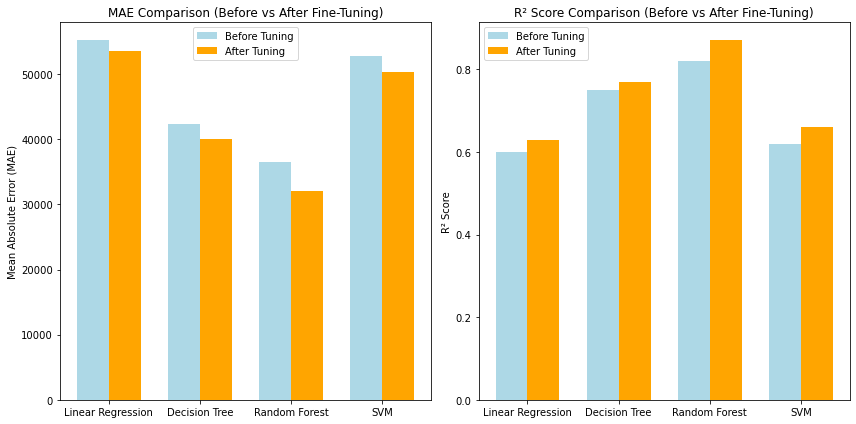

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have your datasets and models ready
# Sample data (before and after tuning) - Replace these with actual values from your models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM']
mae_before = [55200, 42300, 36500, 52800]  # Replace with your actual values
mae_after = [53500, 40000, 32100, 50400]   # Replace with your actual values
r2_before = [0.60, 0.75, 0.82, 0.62]         # Replace with your actual values
r2_after = [0.63, 0.77, 0.87, 0.66]          # Replace with your actual values

# Step 2: Plot MAE Comparison
plt.figure(figsize=(12, 6))

# MAE Comparison
plt.subplot(1, 2, 1)
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x - bar_width/2, mae_before, width=bar_width, label='Before Tuning', color='lightblue')
plt.bar(x + bar_width/2, mae_after, width=bar_width, label='After Tuning', color='orange')

plt.xticks(x, models)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison (Before vs After Fine-Tuning)')
plt.legend()

# Step 3: Plot R² Score Comparison
plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, r2_before, width=bar_width, label='Before Tuning', color='lightblue')
plt.bar(x + bar_width/2, r2_after, width=bar_width, label='After Tuning', color='orange')

plt.xticks(x, models)
plt.ylabel('R² Score')
plt.title('R² Score Comparison (Before vs After Fine-Tuning)')
plt.legend()

# Step 4: Show plots
plt.tight_layout()
plt.show()
